<a href="https://colab.research.google.com/github/kywch/geo-colab/blob/master/TreePedia_Step3_getting_gsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To access the google streetview API, one should have the API key.**
* First, get started with Google Maps platform: https://developers.google.com/maps/gmp-get-started
* Then, get an API key to use Street View Static API: https://developers.google.com/maps/documentation/streetview/get-api-key

---
This notebook uses google-streetview package: https://pypi.org/project/google-streetview/. 
* For documentation, please see https://rrwen.github.io/google_streetview/



In [ ]:
!pip install google-streetview

  Created wheel for google-streetview: filename=google_streetview-1.2.9-cp36-none-any.whl size=9781 sha256=c158ea22b6cfe54c2d185bb007d82eac5be9a3bc9a840fb5f94d82f87f28362b
  Stored in directory: /root/.cache/pip/wheels/e1/ce/c0/e90d7ee251659d215b7ab21a7cd80cfd65e1720fc3dca3b9ed
  Created wheel for kwconfig: filename=kwconfig-1.1.7-cp36-none-any.whl size=4981 sha256=3c3b429bad62138b65a7eb19a899a00ecd3297220ded288ce674f3f73a0f5d4a
  Stored in directory: /root/.cache/pip/wheels/22/fa/82/fed4c9e2829a6210470b121673adddedf169b6319112b3ba20
Successfully built google-streetview kwconfig


In [ ]:
import pandas as pd
import google_streetview.api
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/My\ Drive/StreetPsych

Chicago  HydePark  key.txt


In [ ]:
# Google Street View Static API key
with open('drive/My Drive/StreetPsych/key.txt') as file:
  api_key = file.read()

In [ ]:
location = 'HydePark'
#location = 'Chicago'

picked_df = pd.read_csv('drive/My Drive/StreetPsych/' + location + '/gsv_seed_' + location + '.csv')
picked_df

,Unnamed: 0,lat,lng,bearing,osm_index,gsv_lat,gsv_lng,pano_id,date,status
0,0,41.792784,-87.581656,96.841944,0,41.792797,-87.581747,GHRFbz2JAAvkDmWHU7oswA,2011-06,OK
1,1,41.792707,-87.581137,103.889035,0,41.792710,-87.581160,ufrhNaqGu6SQVbLVgT_w_w,2011-06,OK
2,2,41.788646,-87.584262,113.243840,4,41.788594,-87.584125,wEtBw3PTguAUA2oyo0hs-Q,2011-06,OK
3,3,41.788562,-87.583745,96.709815,4,41.788553,-87.583791,zMSXwtuYNfe_W-N5telkzA,2011-06,OK
4,4,41.788525,-87.583221,110.335822,4,41.788504,-87.583216,aLoxEIp1Jaw6-i7KNE74Lw,2011-06,OK
...,...,...,...,...,...,...,...,...,...,...
382,382,41.798306,-87.602805,358.951042,2043,41.798292,-87.602808,EUabOjfF7IvKIRLocsyfyA,2019-05,OK
383,383,41.798831,-87.602817,358.951051,2043,41.798839,-87.602822,cxYcRxH5dSerNG_3ExXstg,2019-05,OK
384,384,41.796865,-87.602770,358.980059,2044,41.796822,-87.602765,7LyyRE6hKmFNrtjI5EagDQ,2019-04,OK
385,385,41.797390,-87.602782,358.980067,2044,41.797362,-87.602782,BhgMwSc2pJNzR3W9XNcDjQ,2019-04,OK


In [ ]:
# Import google_streetview for the api and helper module
import google_streetview.api
import google_streetview.helpers

In [ ]:
params = [{
  'key': api_key,
  'pano': 'BhgMwSc2pJNzR3W9XNcDjQ',
  'heading': '90',
  'fov': '120',
  'size': '630x630'
}]

In [ ]:
import requests
import shutil

try:
  from urllib.parse import urlencode
except ImportError:
  from urllib import urlencode

site_api='https://maps.googleapis.com/maps/api/streetview'
links = [site_api + '?' + urlencode(p) for p in params]


def download(url, file_path):
  r = requests.get(url, stream=True)
  if r.status_code == 200: # if request is successful
    with open(file_path, 'wb') as f:
      r.raw.decode_content = True
      shutil.copyfileobj(r.raw, f)

# (download) Download images if status from metadata is ok
for i, url in enumerate(self.links):
  if metadata[i][metadata_status] == status_ok:
    file_path = path.join(dir_path, 'gsv_' + str(i) + '.jpg')
    metadata[i]['_file'] = path.basename(file_path) # add file reference
    helpers.download(url, file_path)

In [ ]:
# Create a results object for all possible queries
results = google_streetview.api.results(api_list)
results

In [ ]:
# Preview results
#results.preview()
len(results.metadata)

12

In [ ]:
results.download_links('tmp')

In [ ]:
!ls tmp

gsv_0.jpg   gsv_1.jpg  gsv_4.jpg  gsv_7.jpg  metadata.json
gsv_10.jpg  gsv_2.jpg  gsv_5.jpg  gsv_8.jpg
gsv_11.jpg  gsv_3.jpg  gsv_6.jpg  gsv_9.jpg


In [ ]:
!cat tmp/metadata.json

[{"copyright": "\u00a9 Google", "date": "2019-04", "location": {"lat": 41.79736168643436, "lng": -87.60278163513135}, "pano_id": "BhgMwSc2pJNzR3W9XNcDjQ", "status": "OK", "_file": "gsv_0.jpg"}, {"copyright": "\u00a9 Google", "date": "2019-04", "location": {"lat": 41.79736168643436, "lng": -87.60278163513135}, "pano_id": "BhgMwSc2pJNzR3W9XNcDjQ", "status": "OK", "_file": "gsv_1.jpg"}, {"copyright": "\u00a9 Google", "date": "2019-04", "location": {"lat": 41.79736168643436, "lng": -87.60278163513135}, "pano_id": "BhgMwSc2pJNzR3W9XNcDjQ", "status": "OK", "_file": "gsv_2.jpg"}, {"copyright": "\u00a9 Google", "date": "2019-04", "location": {"lat": 41.79736168643436, "lng": -87.60278163513135}, "pano_id": "BhgMwSc2pJNzR3W9XNcDjQ", "status": "OK", "_file": "gsv_3.jpg"}, {"copyright": "\u00a9 Google", "date": "2019-04", "location": {"lat": 41.79736168643436, "lng": -87.60278163513135}, "pano_id": "BhgMwSc2pJNzR3W9XNcDjQ", "status": "OK", "_file": "gsv_4.jpg"}, {"copyright": "\u00a9 Google", "da

In [ ]:
from IPython.display import Image, display

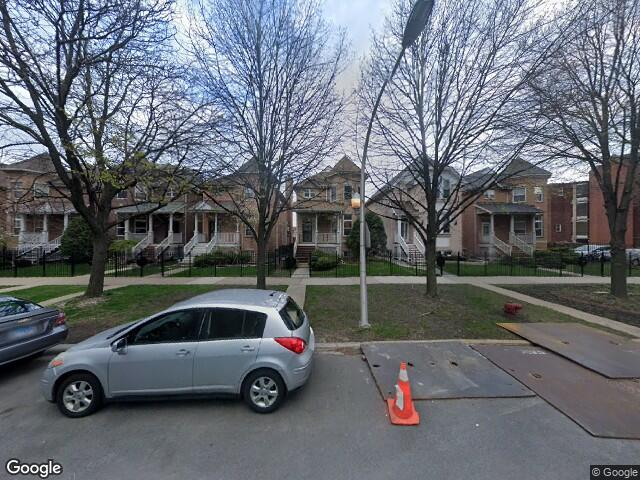

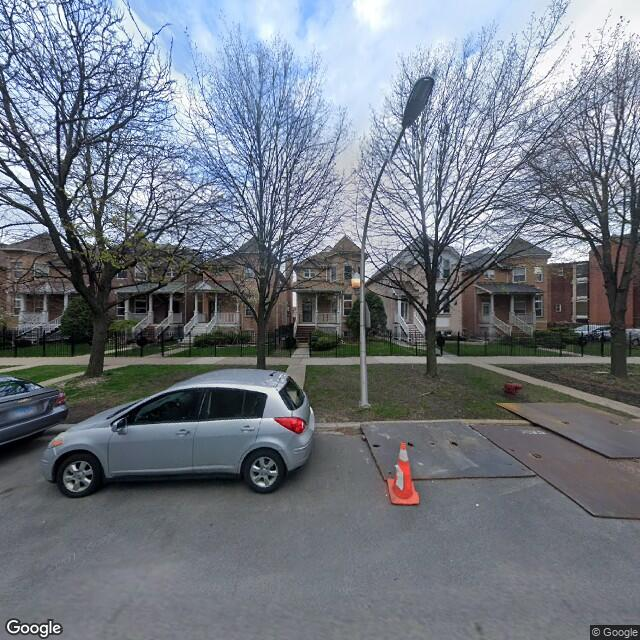

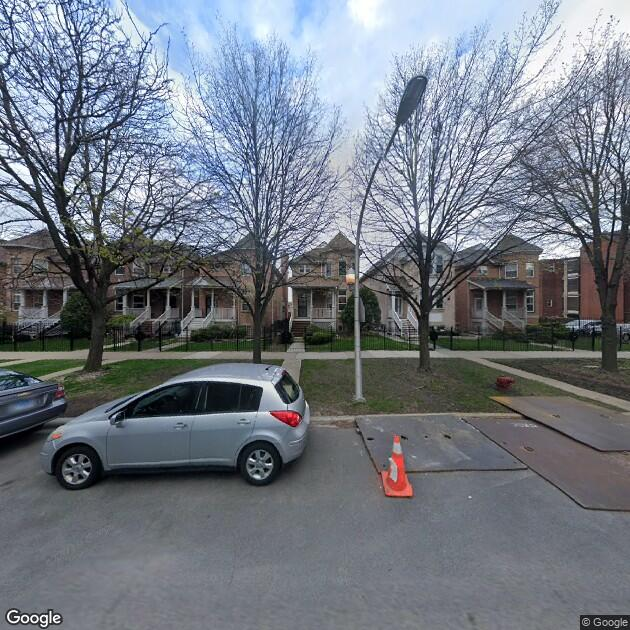

In [ ]:
listOfImageNames = ['tmp/gsv_3.jpg',
                    'tmp/gsv_4.jpg',
                    'tmp/gsv_5.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName))